In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Dog&Cat  SVM

---

### Team members:
* Ziyi Wang   ID 18042783
* Youzhi Lei  ID 19039281

## Content
* Using SVM to classify the dog&cat

---


#### Information about datasets
#### Labeled dogs and cats from Microsoft
* Dogs and Cats image https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [2]:
#!pip install opencv-python

In [3]:
#!pip install tensorflow

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import patsy
import os
from PIL import Image 
import cv2
%matplotlib inline

In [5]:
# import the necessary packages
import sklearn
print(sklearn.__version__)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import argparse
import cv2
import os

0.20.2


In [6]:
def image_to_feature_vector(image, size=(50, 50)):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using
    # the supplied number of `bins` per channel
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    # handle normalizing the histogram if we are using OpenCV 2.4.X
    # if imutils.is_cv2():
    #    hist = cv2.normalize(hist)
    #print("line2")
    # otherwise, perform "in place" normalization in OpenCV 3
    #else:
    cv2.normalize(hist, hist)
    
    # return the flattened histogram as the feature vector
    return hist.flatten()

In [7]:
from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

pd.options.display.max_columns = 50

In [8]:
import os
cwd = os.getcwd()
print(cwd)
#Please put the data to current location, Thanks 

/home/dp1/Documents/fred/codes/machinelearning2019/dogcat


In [9]:
#load the dataset 
#test one image and show 
DATADIR = "../PetImages"
DATADIR = os.path.join(cwd, DATADIR)
print(DATADIR)
CATEGORIES = ["Dog","Cat"]


/home/dp1/Documents/fred/codes/machinelearning2019/dogcat/../PetImages


In [10]:
rawImages = []
features = []
labels = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        #conver the dog and cat to numerical value 0/1
        label = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            try:
                #read  
                imgpath = os.path.join(path,img)
                
                img_array = cv2.imread(imgpath)
                
                img_array = cv2.resize(img_array,(64,64))
                
                pixels = image_to_feature_vector(img_array)
                
                hist = extract_color_histogram(img_array)
                
                
            except Exception as e:
                print(imgpath)
                os.remove(imgpath) 
                continue
                
            rawImages.append(pixels)
            features.append(hist)
            labels.append(label)

            
create_training_data()

In [11]:
print(len(rawImages))
print(len(features))
print(len(labels))



24946
24946
24946


In [12]:
# show some information on the memory consumed by the raw images
# matrix and features matrix
rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(features.nbytes / (1024 * 1000.0)))


[INFO] pixels matrix: 182.71MB
[INFO] features matrix: 49.89MB


In [13]:
from sklearn import preprocessing
#features_scaled = preprocessing.scale(features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled  = scaler.fit(features)

In [14]:
# partition the data into training and testing splits, using 85%
# of the data for training and the remaining 15% for testing
(trainRI, testRI, trainRL, testRL) = train_test_split(rawImages, labels, test_size=0.15, random_state=42)
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(features, labels, test_size=0.15, random_state=42)
#(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(features_scaled, labels, test_size=0.15, random_state=42)

Start reduction...


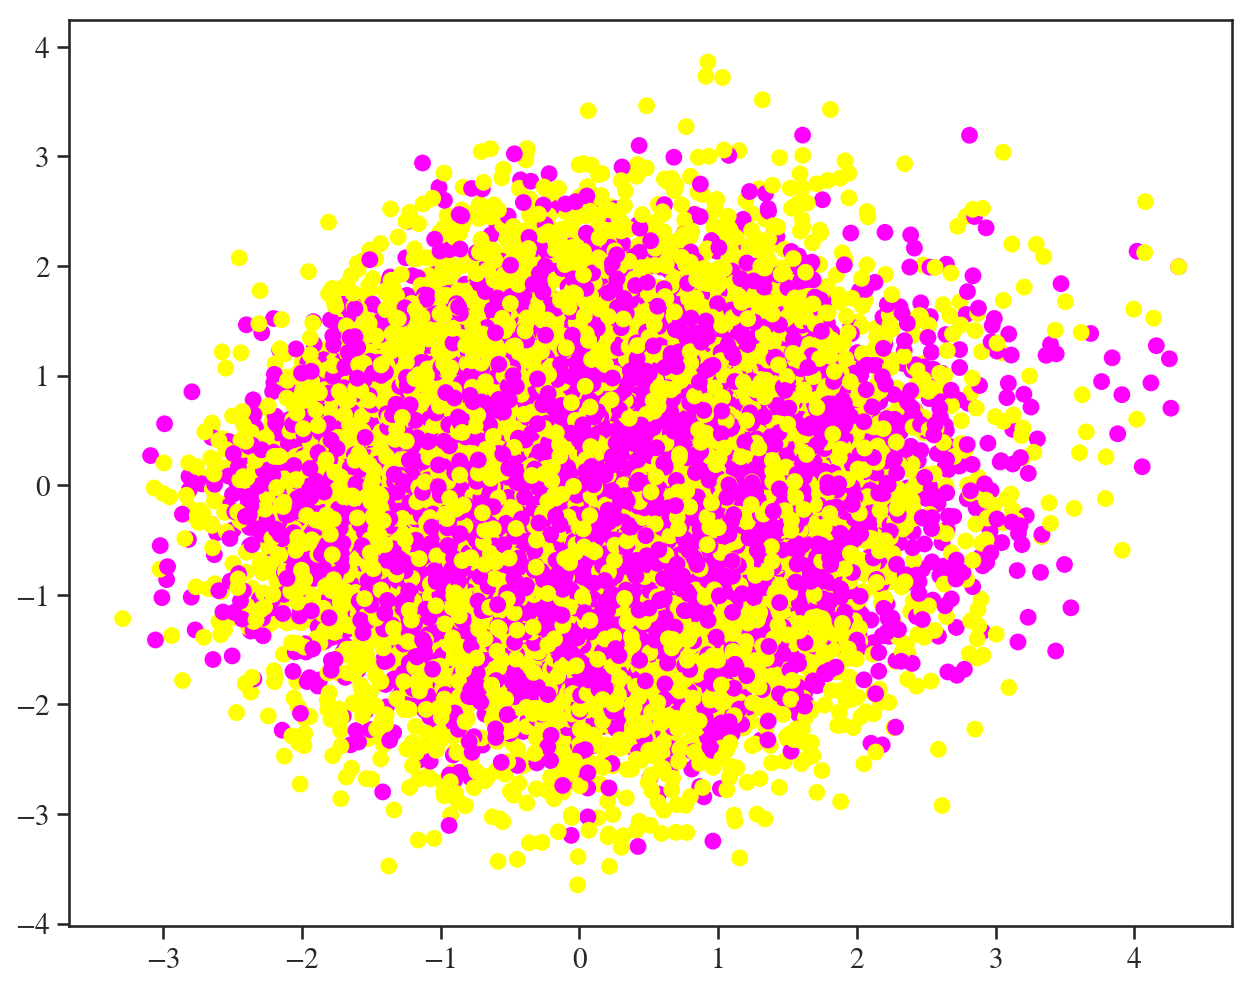

In [31]:
import time

import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.decomposition import PCA    
    # pca降维
print("Start reduction...")
pca = PCA(n_components = 8 , whiten=True)
trainRI_features = pca.fit_transform(trainRI)
# plotting scatters  
plt.scatter(trainRI_features[:, 0], trainRI_features[:, 1], c=trainRL, s=50, cmap='spring'); 
plt.show()  

In [15]:
#import pickle
#dataset = {
    #'trainRI': trainRI,
    #'testRI' : testRI,
    #'trainRL': trainRL,
    #'testRL' : testRL
#}
#filename = 'rawImagesdataset.pickle'

#outfile = open(filename,'wb+')
#print(outfile)
#pickle.dump(dataset,outfile)
#outfile.close()


In [16]:
#import pickle

#dataset = {
 #   'trainFeat': trainFeat,
  #  'testFeat' : testFeat,
   # 'trainLabels': trainLabels,
    #'testLabels' : testLabels
#}
#filename = 'features_scaleddataset.pickle'

#outfile = open(filename,'wb+')
#print(outfile)
#pickle.dump(dataset,outfile)
#outfile.close()


In [17]:
%%time
# k-NN
print("\n")
print("[INFO] evaluating raw pixel accuracy...")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(trainRI, trainRL)
acc = model.score(testRI, testRL)
#print("[INFO] k-NN classifier: k=%d" % args["neighbors"])
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))




[INFO] evaluating raw pixel accuracy...
[INFO] raw pixel accuracy: 55.05%
CPU times: user 12min 34s, sys: 352 ms, total: 12min 34s
Wall time: 12min 34s


In [18]:
%%time
#neural network
print("\n")
print("[INFO] evaluating raw pixel accuracy...")
model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=1e-4,
                      solver='sgd', tol=1e-4, random_state=1,
                      learning_rate_init=.1)
model.fit(trainRI, trainRL)
acc = model.score(testRI, testRL)
print("[INFO] neural network raw pixel accuracy: {:.2f}%".format(acc * 100))

UsageError: Line magic function `%%time` not found.


In [ ]:
%%time
#neural network
print("\n")
print("[INFO] evaluating histogram accuracy...")
model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=1e-4,
                      solver='sgd', tol=1e-4, random_state=1,
                      learning_rate_init=.1)
model.fit(trainFeat, trainLabels)
acc = model.score(testFeat, testLabels)
print("[INFO] neural network histogram accuracy: {:.2f}%".format(acc * 100))


In [ ]:
#import pickle

#with open('rawImagesdataset.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
 #   rawImagesdataset = pickle.load(f)
  #  f.close()
    
#(trainRI, testRI, trainRL, testRL) =   rawImagesdataset  

In [19]:
%%time
#SVC
print("\n")
print("[INFO] evaluating raw pixel accuracy...")
model = SVC(max_iter=1000,class_weight='balanced')
model.fit(trainRI, trainRL)
acc = model.score(testRI, testRL)
print("[INFO] SVM-SVC raw pixel accuracy: {:.2f}%".format(acc * 100))




[INFO] evaluating raw pixel accuracy...


/home/dp1/.conda/envs/tensorflow/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/dp1/.conda/envs/tensorflow/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[INFO] SVM-SVC raw pixel accuracy: 51.02%
CPU times: user 5min 45s, sys: 604 ms, total: 5min 46s
Wall time: 5min 44s


In [20]:
#import pickle

#with open('features_scaleddataset.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
 #   features_scaleddataset = pickle.load(f)
  #  f.close()
    
#(trainRI, testRI, trainRL, testRL) =   features_scaleddataset  

In [12]:
%%time
#SVC
print("\n")
print("[INFO] evaluating histogram accuracy...")
model = SVC(max_iter=1000,class_weight='balanced')
model.fit(trainFeat, trainLabels)
acc = model.score(testFeat, testLabels)
print("[INFO] SVM-SVC histogram accuracy: {:.8f}%".format(acc * 100))



[INFO] evaluating histogram accuracy...


/usr/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[INFO] SVM-SVC histogram accuracy: 51.01549973%
CPU times: user 18.9 s, sys: 47.6 ms, total: 18.9 s
Wall time: 17.8 s


In [15]:
%%time
#SVC   poly
print("\n")
print("[INFO] evaluating histogram accuracy...")
#model = SVC(max_iter=1000,class_weight='balanced')
model = SVC(C=1.0, kernel='poly', degree=2, gamma=5,max_iter=1000,class_weight='balanced')
model.fit(trainFeat, trainLabels)
acc = model.score(testFeat, testLabels)
print("[INFO] SVM-SVC histogram accuracy: {:.8f}%".format(acc * 100))



[INFO] evaluating histogram accuracy...


/home/dp1/.conda/envs/tensorflow/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[INFO] SVM-SVC histogram accuracy: 55.29128808%
CPU times: user 23.6 s, sys: 24 ms, total: 23.6 s
Wall time: 23 s


In [24]:
%%time
#SVC   poly
print("\n")
print("[INFO] evaluating histogram accuracy...")
#model = SVC(max_iter=1000,class_weight='balanced')
model = SVC(C=3.0, kernel='poly', degree=2, gamma=5,max_iter=500,class_weight='balanced')
model.fit(trainFeat, trainLabels)
acc = model.score(testFeat, testLabels)
print("[INFO] SVM-SVC histogram accuracy: {:.8f}%".format(acc * 100))



[INFO] evaluating histogram accuracy...


/home/dp1/.conda/envs/tensorflow/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[INFO] SVM-SVC histogram accuracy: 55.13094602%
CPU times: user 11.7 s, sys: 16 ms, total: 11.7 s
Wall time: 11.7 s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with

# Take the first two features. We could avoid this by using a two-dim dataset
X = trainRI
y = trainRL

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
plt.xlabel(X)